In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
)

In [3]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

def bias(y, z):
    return (y - z)

def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [4]:
def get_error_plot(n_trees, max_depth, eta, X_train, X_test, y_train, y_test):

    plt.figure(figsize=(25,7))
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.ylim(0, 30000)

    x = list(range(n_trees))

    print(f'n_trees={n_trees} max_depth={max_depth}')
    for eta_ in eta:
        print(f'\neta={eta_}')

        coefs = [1] * n_trees

        trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta_)

        print(f'Train: {mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta_))}')
        print(f'Test: {mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta_))}')

        plt.plot(x, train_errors, label=f'train eta={eta_}')
        plt.plot(x, test_errors, label=f'test eta={eta_}')

    plt.legend()
    plt.show()

n_trees=10 max_depth=3

eta=0.01
Train: 24126.570570814903
Test: 24745.825672607512

eta=0.1
Train: 5773.037399764153
Test: 5782.297258700572

eta=1
Train: 1176.5128269250501
Test: 3952.9907311686843


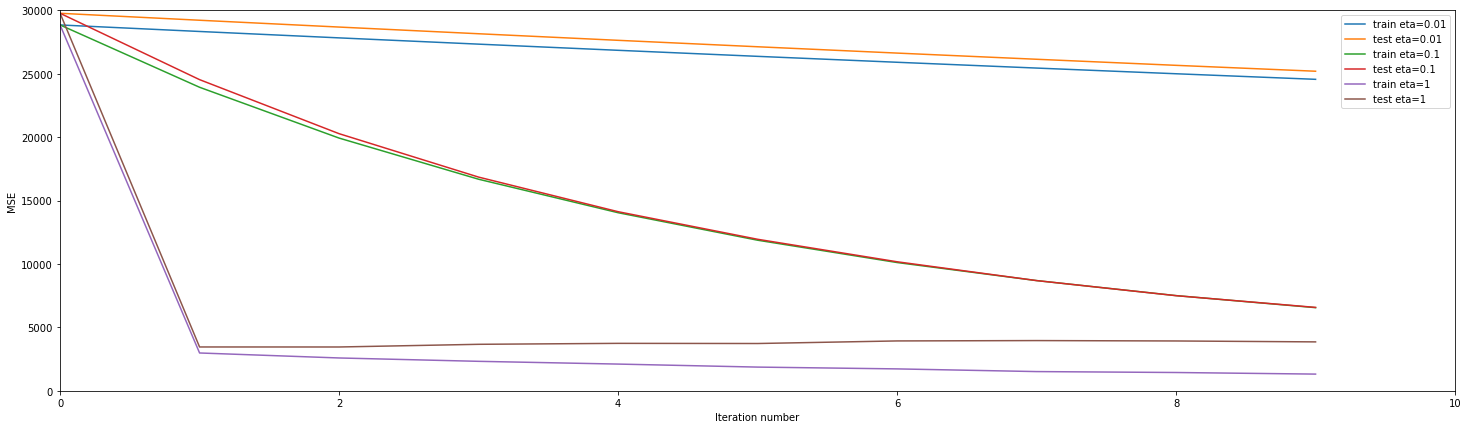

In [5]:
get_error_plot(10, 3, [0.01, 0.1, 1], X_train, X_test, y_train, y_test)

n_trees=10 max_depth=5

eta=0.01
Train: 23946.701337756538
Test: 24738.815219080818

eta=0.1
Train: 4736.61789148456
Test: 6085.4021795553035

eta=1
Train: 140.19823892854893
Test: 5203.653443294673


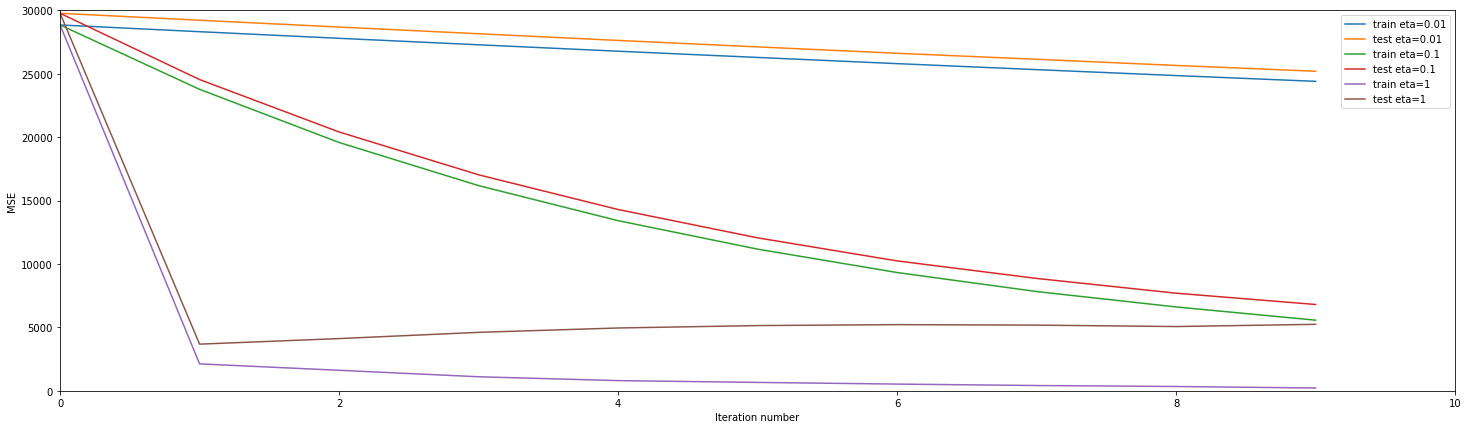

In [6]:
get_error_plot(10, 5, [0.01, 0.1, 1], X_train, X_test, y_train, y_test)

n_trees=10 max_depth=10

eta=0.01
Train: 23639.32646297121
Test: 25014.79774444222

eta=0.1
Train: 3602.0031493049682
Test: 6836.8088429281015

eta=1
Train: 1.9894503918266377e-08
Test: 5625.551922803806


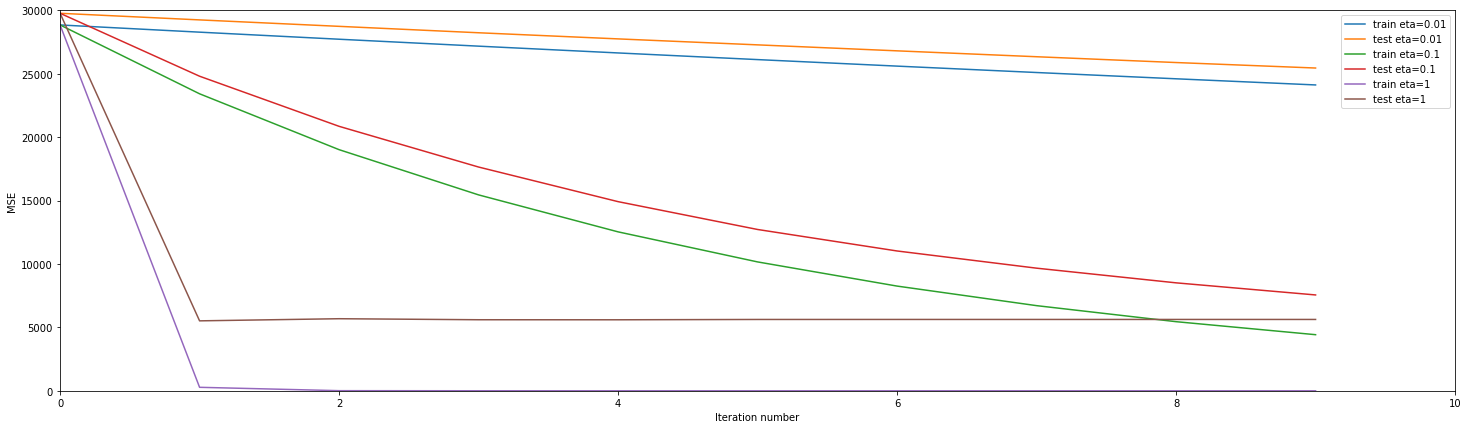

In [7]:
get_error_plot(10, 10, [0.01, 0.1, 1], X_train, X_test, y_train, y_test)

### При n_trees=10 и увеличении max_depth видно, что происходит переобучение модели

### Увеличим n_trees до 25

n_trees=25 max_depth=3

eta=0.01
Train: 18596.509863235497
Test: 18898.04611939806

eta=0.1
Train: 2154.2719604077142
Test: 2830.7931233893833

eta=1
Train: 386.92544491299674
Test: 4837.282160612712


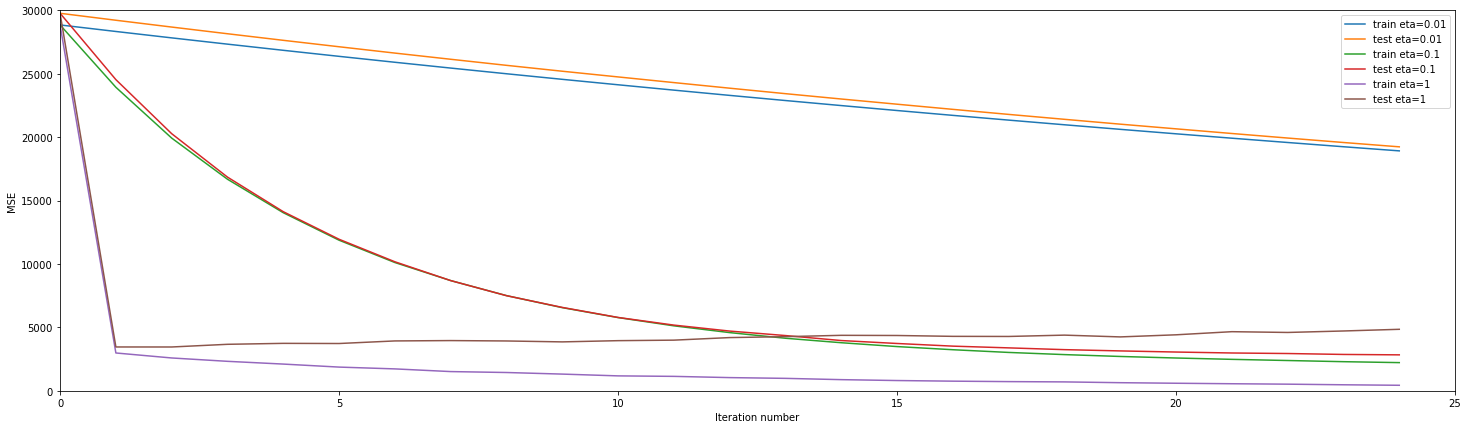

In [8]:
get_error_plot(25, 3, [0.01, 0.1, 1], X_train, X_test, y_train, y_test)

n_trees=25 max_depth=5

eta=0.01
Train: 18159.870828936342
Test: 18921.14951350495

eta=0.1
Train: 910.5957728364805
Test: 3267.296512957361

eta=1
Train: 2.3374598273766605
Test: 5112.597299909726


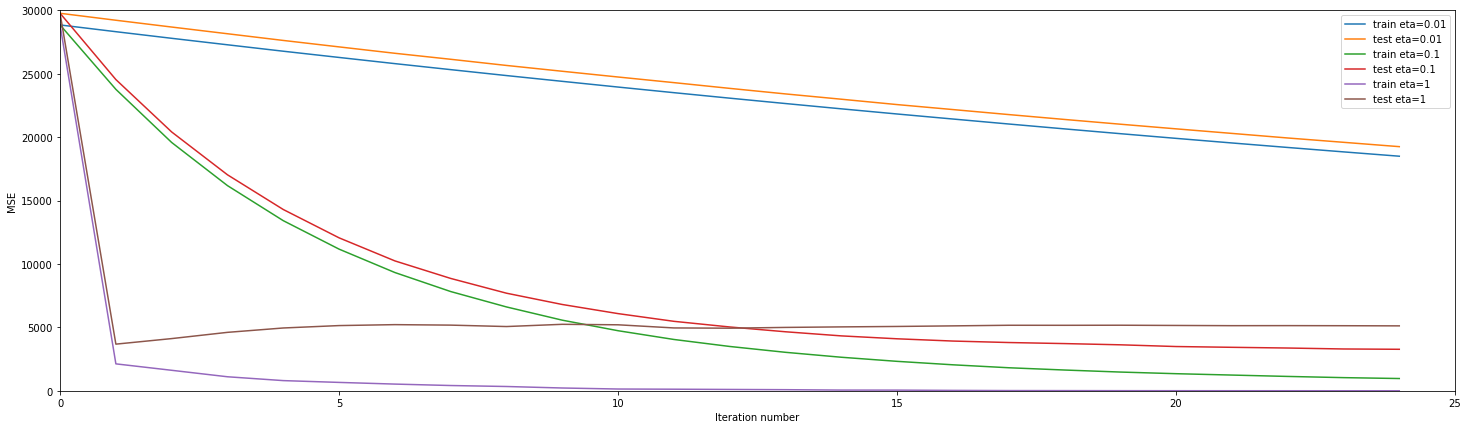

In [9]:
get_error_plot(25, 5, [0.01, 0.1, 1], X_train, X_test, y_train, y_test)

n_trees=25 max_depth=10

eta=0.01
Train: 17550.61135106491
Test: 19460.18008444003

eta=0.1
Train: 157.78347639190818
Test: 4127.195608699945

eta=1
Train: 0.0
Test: 5625.55521427924


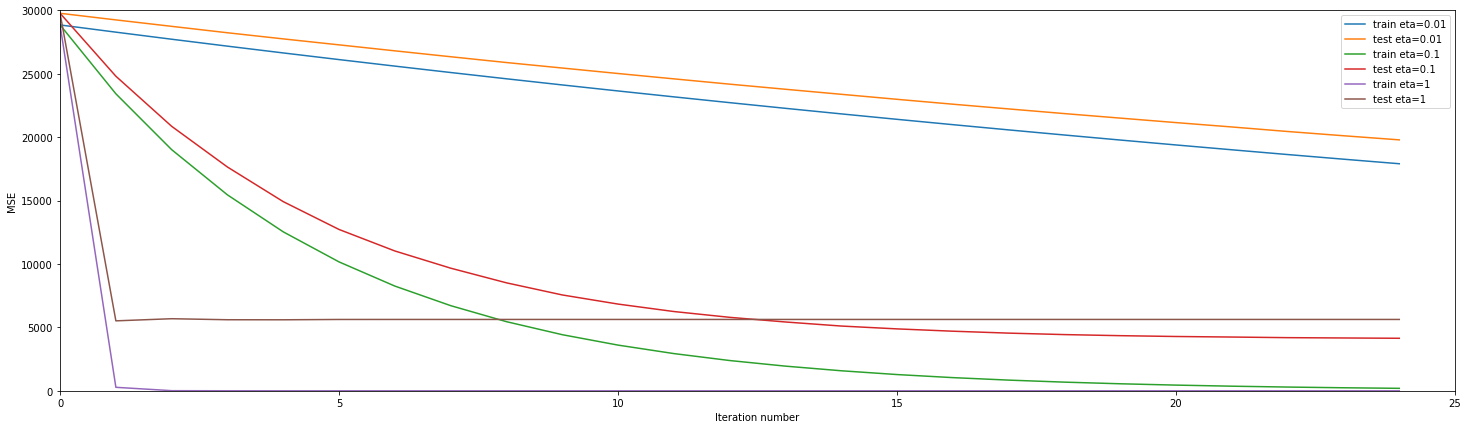

In [10]:
get_error_plot(25, 10, [0.01, 0.1, 1], X_train, X_test, y_train, y_test)

### При n_trees=25 и увеличении max_depth также видно, что происходит переобучение модели

### Лучшие показатели с параметрами
* n_trees=25
* max_depth=3
* eta=0.1

Train: 2025.7673449113324

Test: 2987.9530416250623

Наименьший показатель MSE на тестовой выборке плюс умеренное переобучение.